### Importing important libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import math

### Importing, exploring and filtering out the dataset

In [5]:
RawData = pd.read_csv('data.csv')

In [6]:
print(RawData.shape)
RawData.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
filterMalignant = RawData['diagnosis'] == 'M' #filter to identify the Malignant data from RawData, it is a boolen vector.
MalignData = RawData[filterMalignant] # filtering out the Malignant data from RawData
print(MalignData.shape)
MalignData.head()

(212, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
filterBenignant = RawData['diagnosis'] == 'B'
BenignData = RawData[filterBenignant]
print(BenignData.shape)
BenignData.head()

(357, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN


### Even splitting of dataset for malignant and benignant tumor in Training Dataset

We do even splitting of dataset because prior probability depends on the occurence of an event in the dataset.
We don't want our estimate to be biased on the prior probability instead of features.

Here we will try to keep the training data approximately the 75 percent of the total available data.

In [9]:
int(RawData.shape[0]*0.75)

426

Out of 426 rows of data half will be from Benignant and half from Malignant.

In [10]:
nMalignant = nBenignant = int(RawData.shape[0]*0.75)/2
print(nMalignant)

213.0


Since, Malignant dataset has only 212 so we will take 212 rows from each dataset. And we will leave first 2 columns because 'id' doesn't help in any estimate and 'diagnosis' is the parameter we will estimate.

In [11]:
MalignantTrainingDataset = MalignData.iloc[:213,2:]
print(MalignantTrainingDataset.shape)

(212, 31)


In [12]:
BenignantTrainingDaataset = BenignData.iloc[:212,2:]
print(BenignantTrainingDaataset.shape)

(212, 31)


### Calculating parameter from the Training Dataset

For understanding concept, first we will consider only 'radius_mean' for learning the parameter.

In [13]:
muCapMalignant = MalignantTrainingDataset['radius_mean'].mean() #Calculating mean for Malignant Training Dataset
print(muCapMalignant)
sigmaCapMalignant = MalignantTrainingDataset['radius_mean'].std()
print(sigmaCapMalignant)

17.46283018867925
3.2039711007793663


In [14]:
muCapBenignant = BenignantTrainingDaataset['radius_mean'].mean() #Calculating mean for Beningnat Training Dataset
print(muCapBenignant)
sigmaCapBenignant = BenignantTrainingDaataset['radius_mean'].std()
print(sigmaCapBenignant)

12.073655660377364
1.746899511868088


Prior probability will be equal to 0.5 for both because we have kept the distribution of both event even in the training dataset.

In [15]:
pCapMalignant = pCapBenignant = 0.5

### Visualization

Visualizing the Training Dataset to get a insight of how data is distributed under Malignant and Bening on the basis of radius_mean. 

Text(0.5,0,'x-axis')

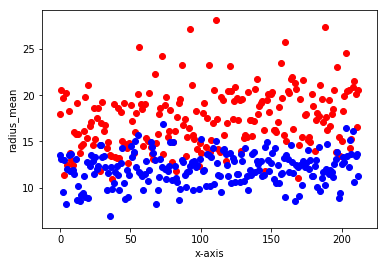

In [16]:
plt.scatter(np.linspace(0,212,212),MalignantTrainingDataset['radius_mean'], color = 'red')
plt.scatter(np.linspace(0,212,212),BenignantTrainingDaataset['radius_mean'], color = 'blue')
plt.ylabel('radius_mean')
plt.xlabel('x-axis')

Here in the above dot plot, red dot represent the Malignant and blue dot represent Beningnant tumor. From this graph we understand that the radius_mean of Malignant tumor is mostly greater than the Bening tumor. This is actually a very helpful insight and also support our calculation that **(muCapBenignant < muCapMalignant)**.

In [17]:
MalignantTrainingDataset['radius_mean'].min()

10.95

In [18]:
MalignantTrainingDataset['radius_mean'].max()

28.11

In [19]:
MalignantTrainingDataset['radius_mean'].mean()

17.46283018867925

Here, our plot will have 5 intervals and it will have its high frequency of values around the mean.

In [20]:
rangeM = (28.11-10.95)/5
print(rangeM)

3.432


In [21]:
frequencyM = [0]*5
for i in range(212):
    temp = MalignantTrainingDataset.iloc[i,0]
    if  temp < (10.95 + rangeM):
        frequencyM[0]+=1
    elif temp< (10.95 + 2*rangeM):
        frequencyM[1]+=1
    elif temp < (10.95 + 3*rangeM):
        frequencyM[2]+=1
    elif temp < (10.95 + 4*rangeM):
        frequencyM[3]+=1
    else:
        frequencyM[4]+=1

In [22]:
print(frequencyM)

[37, 78, 78, 14, 5]


In [23]:
rangeMeanM = []
for i in range(1,6):
    rangeMeanM.append(10.95 + i*rangeM)
print(rangeMeanM)

[14.382, 17.814, 21.246, 24.677999999999997, 28.11]


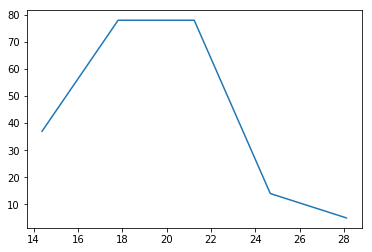

In [24]:
plt.plot(rangeMeanM,frequencyM)

Another of plotting the graph will be using the **plt.hist** which by default give 10 bars in the plot.

In [25]:
BenignantTrainingDaataset['radius_mean'].mean()

12.073655660377364

You will observe more concentration around the mean of the dataset because mean values has high likelihood to occur. 

(array([ 1., 10., 18., 22., 45., 47., 42., 15.,  9.,  3.]),
 array([ 6.981 ,  7.9669,  8.9528,  9.9387, 10.9246, 11.9105, 12.8964,
        13.8823, 14.8682, 15.8541, 16.84  ]),
 <a list of 10 Patch objects>)

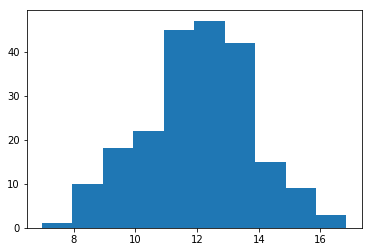

In [26]:
plt.hist(BenignantTrainingDaataset['radius_mean'])

### Likelihood Function

Now to calculate likelihood function(i.e. P(TumorSize given that TumorIsMalignant))we will write a function for the below function.It tells about which value is more likely to occur in the distribution.

<img src = 'likelihood.png'>

In [27]:
def likelihoodFunction(x, mean,sigma):
    
    num = math.exp(-((x - mean)**2)/(2*(sigma**2)))
    denom = math.sqrt(2*math.pi*(sigma**2))
    return num/denom

In [28]:
likelihoodFunction(4.3,muCapBenignant,sigmaCapBenignant)

1.1445534663551529e-05

### Uni-variate Naive Bayes Classifier

We will make a function which will take the value of tumor size in input and will return the prediction

<img src = 'naive_bayes.png'>

In [29]:
def UniVariateNaiveBayesClassifier(oneExample):
    
    # P(size | Tumor is Malignant)
    # likelihood function for size of Tumor when it is Malignant
    pSizeGivenTumorIsMalignant = likelihoodFunction(oneExample,muCapMalignant, sigmaCapMalignant)
    
    numerator = pCapMalignant*pSizeGivenTumorIsMalignant
    
    # P(size | Tumor is Benignant)
    pSizeGivenTumorIsBenignant = likelihoodFunction(oneExample, muCapBenignant, sigmaCapBenignant)
    
    evidence = numerator + pSizeGivenTumorIsBenignant*pCapBenignant
    
    # P(Tumor is Malignant | size)
    pTumorIsMalignantGivenSize =  numerator/evidence
    
    return pTumorIsMalignantGivenSize

Now This fuction will tell about how likeli is the patient has Malignant Tumor if the size of Tumor is given.

In [30]:
UniVariateNaiveBayesClassifier(15.5)

0.7557124494102121

### Testing the model on test set for finding how well our model perform on unseen dataset

In [31]:
BenignantTestData = BenignData.iloc[212:,:]
BenignantTestData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
381,901836,B,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,...,20.83,79.73,447.1,0.10950,0.1982,0.1553,0.06754,0.3202,0.07287,NaN
382,90250,B,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,...,28.71,87.36,488.4,0.08799,0.3214,0.2912,0.10920,0.2191,0.09349,NaN
383,90251,B,12.39,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,...,23.13,95.23,600.5,0.14270,0.3593,0.3206,0.09804,0.2819,0.11180,NaN
384,902727,B,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,...,17.37,96.59,623.7,0.11660,0.2685,0.2866,0.09173,0.2736,0.07320,NaN
386,902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,...,19.29,87.65,529.9,0.10260,0.2431,0.3076,0.09140,0.2677,0.08824,NaN


In [32]:
print(BenignantTestData.shape)

(145, 33)


In [33]:
truePositive = 0  # If Tumor is Malignant and our model predict >= 0.5
trueNegative = 0  # If Tumor is Benignant and our model predict < 0.5
falseNegative = 0 # If Tumor is Malignant and our model predict < 0.5
falsePositive = 0 # If Tumor is Benignant and our model predict > 0.5

for i in range(145):
    oneExample = BenignantTestData['radius_mean'].iloc[i]
    
    prediction = UniVariateNaiveBayesClassifier(oneExample)
    
    actual = BenignantTestData['diagnosis'].iloc[i]
    
    if actual == 'M' and prediction >= 0.5:
        truePositive+=1
    elif actual == 'B' and prediction <= 0.5:
        trueNegative+=1
    elif actual == 'M' and prediction <= 0.5:
        falseNegative +=1
    else:
        falsePositive+=1

In [34]:
accuracy = (truePositive+trueNegative)/145
print(accuracy)

0.8896551724137931


89% accuracy is not that bad. But in this case we are interested how many cases our algorithm actually identify as Malignant because a **falsePositive** case will also be okay to take atleast a precaution or test.

In [35]:
print("Total_positively_identified by the model is=>",truePositive+falsePositive)

Total_positively_identified by the model is=> 16


Since all the data in the test is actuall Benign so it seems okay to have 16 patient identified as having Malignant they could be having a boundary or rare case.

Till now we have only considered only a single feature(i.e Tumor's radius_mean) now we will try to estimate on over 2 parameters(i.e. radius_mean and texture_mean).

### Calculating the Parameters for the multivariate model

In [36]:
muCapBenignant = np.array(BenignantTrainingDaataset[['radius_mean','texture_mean']].mean())
print(muCapBenignant)

[12.07365566 17.16367925]


In [37]:
muCapMalignant = np.array(MalignantTrainingDataset[['radius_mean','texture_mean']].mean())
print(muCapMalignant)

[17.46283019 21.60490566]


In [38]:
np.array(MalignantTrainingDataset[['radius_mean','texture_mean']].cov())

array([[10.26543081,  1.28984055],
       [ 1.28984055, 14.28439288]])

In [39]:
sigmaCapMalignant = np.array(MalignantTrainingDataset[['radius_mean','texture_mean']].cov())
print(sigmaCapMalignant)

[[10.26543081  1.28984055]
 [ 1.28984055 14.28439288]]


In [40]:
sigmaCapBenignant = np.array(BenignantTrainingDaataset[['radius_mean','texture_mean']].cov())
print(sigmaCapBenignant)

[[ 3.0516579   0.16658933]
 [ 0.16658933 11.5633845 ]]


### Visualization

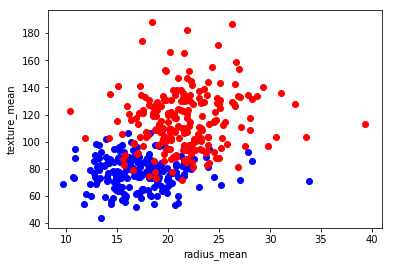

In [41]:
plt.scatter(BenignantTrainingDaataset.iloc[:,1], BenignantTrainingDaataset.iloc[:,2], color = 'blue')
plt.scatter(MalignantTrainingDataset.iloc[:,1], MalignantTrainingDataset.iloc[:,2], color = 'red')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

From Here we get a rough insight of how could be population distribution of the Malignant and Benignant tumor on the basis of radius_mean and texture_mean.

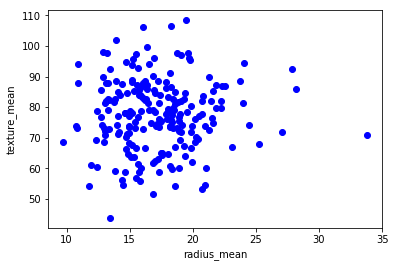

In [42]:
plt.scatter(BenignantTrainingDaataset.iloc[:,1], BenignantTrainingDaataset.iloc[:,2], color = 'blue')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

In [43]:
sigmaCapBenignant = np.array(BenignantTrainingDaataset[['radius_mean','texture_mean']].cov())
print(sigmaCapBenignant)

[[ 3.0516579   0.16658933]
 [ 0.16658933 11.5633845 ]]


Since the covariance matrix of **BenignantTrainingDaataset** have value greater than zero for value between **radius_mean** and **texture_mean**. So, we can say that there is a direct relation between the two attributes or features.

### Multi-Variate Bayes Classifier

<img src = 'naive_bayes.png'>

Writing formula everytime may not be convenient so we are now going to use the ***scipy*** library to calculate the multivariate likelihood function.

In [44]:
import scipy.stats as S

In [45]:
def multiVariateBayesClassifier(oneExample):
    
    # P(radius_mean = r0 and texture_mean = t0 | TumorIsMalignant)
    pFeaturesGivenTumorIsMalignant = S.multivariate_normal.pdf(oneExample,muCapMalignant, sigmaCapMalignant)

    numerator = pCapMalignant*pFeaturesGivenTumorIsMalignant
    
    # P(radius_mean = r0 and texture_mean = t0 | TumorIsBenignant)
    pFeaturesGivenTumorIsBenignant = S.multivariate_normal.pdf(oneExample, muCapBenignant, sigmaCapBenignant)
    
    
    evidence = pCapBenignant*pFeaturesGivenTumorIsBenignant + numerator
    
    # P(TumorIsMalignant | radius_mean = r0 and texture_mean = t0 )
    pTumorIsMalignantGivenFeatures = numerator/evidence
    
    return pTumorIsMalignantGivenFeatures

In [46]:
truePositive = 0 
trueNegative = 0
falseNegative = 0
falsePositive = 0

for i in range(145):
    oneExample = BenignantTestData[['radius_mean','texture_mean']].iloc[i]
    
    prediction = multiVariateBayesClassifier(oneExample)
    
    actual = BenignantTestData['diagnosis'].iloc[i]
    
    if actual == 'M' and prediction >= 0.5:
        truePositive+=1
    elif actual == 'B' and prediction <= 0.5:
        trueNegative+=1
    elif actual == 'M' and prediction <= 0.5:
        falseNegative +=1
    else:
        falsePositive+=1

In [47]:
accuracy = (truePositive+trueNegative)/145
print(accuracy)

0.8137931034482758


The accuracy has gone down as compared to univariate,may be texture mean was not that big helpful and it may be making our model overfit on the data. So, blindly adding the variable will also not help in increasing the accuracy of the model. May make our model subject to overfit.

In [48]:
print("Total_positively_identified by the model is=>",truePositive+falsePositive)

Total_positively_identified by the model is=> 27


Since the test data is totally benignant so 27 benignant patient are identified as Malignant.

With more features added in the trainging data the degree of freedom also increases so it could take uneven path to fit our data. Therefore, we should be cautious before selecting the features to train our model.